# Introducción al Deep Learning: fundamentos, arquitecturas y aplicaciones
## David de la Rosa de la Rosa (drrosa@ujaen.es)
## Manuel Germán Morales (mgerman@ujaen.es)

### Redes Neuronales: Introducción a la Inteligencia Artificial y Aprendizaje Profundo

En este cuaderno aprenderemos cómo se programa una Red Neuronal Convolucional con Pytorch Lightning.

Antes de nada, vamos a importar Pytorch Lightning...

RECUERDA: cambia el tipo de entorno de ejecución a GPU



In [ ]:
!pip install pytorch_lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.1/823.1 kB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 75.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 962.5/962.5 kB 65.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-

# Carga de datos

Lo primero que vamos a hacer es cargar las imágenes con las que vamos a trabajar. Existen muchísimos datasets de imágenes para clasificación. Por simplificar el proceso de carga de datos, en este cuaderno utilizaremos un dataset que nos proporciona la librería *torchvision*. De esta forma, nos ahorramos tener que cargar a mano los datos.

El dataset que vamos a utilizar es CIFAR 10. Está orientado a clasificación multiclase. Cuenta con un total de 10 clases diferentes que representan diversos objetos y animales:

- Avión
- Automóvil
- Pájaro
- Gato
- Ciervo
- Perro
- Rana
- Caballo
- Barco
- Camión


Si queréis más información podéis visitar la web del dataset: https://www.cs.toronto.edu/~kriz/cifar.html

Comenzamos estableciendo el parámetro BATCH_SIZE

In [ ]:
BATCH_SIZE = 256  # Tamaño de lote. Cuántas imágenes se procesan de forma simultánea

Cargamos el conjunto de entrenamiento.

RECUERDA: Primero se crea un Dataset, que cargamos con un Dataloader

In [ ]:
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader


# En primer lugar, cargamos las imágenes de entrenamiento

# Creamos el dataset... Ya lo tenemos hecho gracias a torchvision!
train_dataset = datasets.CIFAR10(
    root="./data",  # Ruta donde se guardarán las imágenes
    train=True,  # Indica que solo queremos la partición de entrenamiento (gracias torchvision!)
    transform=transforms.ToTensor(),  # Transformamos las imágenes a Tensores ya que estamos. IMPORTANTE: esto normaliza las imágenes a valores [0,1]
    download=True,  # Nos lo descargamos para que sea más rápido
)

# Ya tenemos el dataset, ahora lo cargamos con un dataloader
train_loader = DataLoader(
    dataset=train_dataset,  # Referencia al dataset
    batch_size=BATCH_SIZE,  # El batch size (recuerda lo que era...)
    num_workers=2,  # Subprocesos y cosas de optimizar la carga
    drop_last=True,  # Si queremos eliminar el último batch
    shuffle=True,  # Al ser el conjunto de entrenamiento siempre está bien mezclar aleatoriamente las instancias
)



100%|██████████| 170M/170M [00:04<00:00, 37.0MB/s]


Hacemos lo mismo pero con el conjunto de test

In [ ]:
test_dataset = datasets.CIFAR10(
    root="./data",
    train=False,  # Indicamos que queremos el conjunto de test
    transform=transforms.ToTensor(),
    download=True,
)

test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=BATCH_SIZE,
    num_workers=2,
    drop_last=False,
    shuffle=False,  # No nos hace falta mezclar el de test. No sirve para entrenar
)

**[EJERCICIO]**: ¿Y si quisiéramos un conjunto de validación? ¿De dónde lo sacamos?

In [ ]:
# Podemos iterar sobre el conjunto de entrenamiento para ver algunas características del dataset
for image, label in train_loader:
  print(image.shape)
  print(label.shape)

  break


# También se puede hacer de forma más bonita que con un bucle for y un break (perdón si hay alguien haya visto esto y de clases en fundamentos de programación)
images, labels = next(iter(train_loader))
print("\n")
print(images.shape)
print(labels.shape)

torch.Size([256, 3, 32, 32])
torch.Size([256])


torch.Size([256, 3, 32, 32])
torch.Size([256])


¿Qué significan estos valores?

image.shape --> Información de la imágen

- 256 = El número de elementos que se procesan en cada batch (256 imágenes)
- 3 = El número de canales de la imagen. Al ser 3, sabemos que son imágenes RGB
- 32, 32 = El ancho y el alto de las imágenes. 32x32 píxeles

Vamos a visualizar algunas imágenes

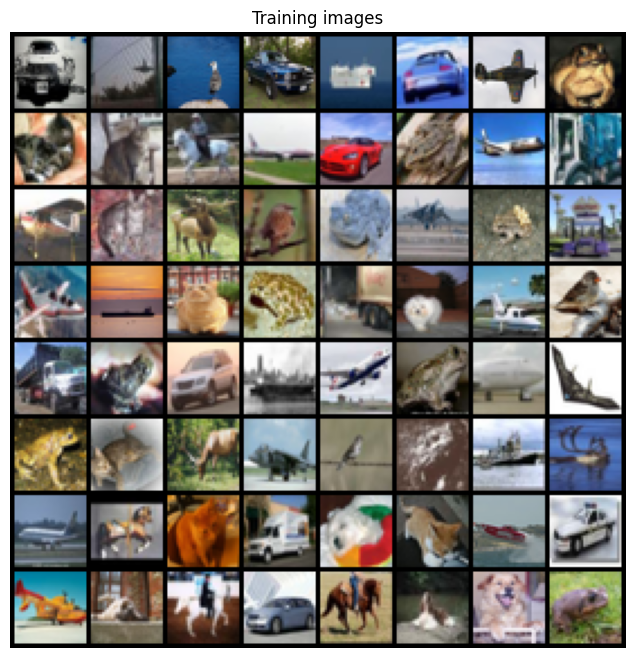

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

# Obtenemos un batch de imágenes
images, labels = next(iter(train_loader))

# Pintamos 64 imágenes en un grid 8x8
plt.figure(figsize=(8, 8))
plt.axis("off")
plt.title("Training images")
plt.imshow(np.transpose(torchvision.utils.make_grid(
    images[:64],
    padding=2,
    normalize=True),
    (1, 2, 0)))
plt.show()

# Creación de la CNN

## ¿Cómo programamos una CNN?

Comenzamos la creación de la CNN

Lo primero es definir el modelo: qué capas tendrá, características de cada capa, funciones de activación...

Para eso no necesitamos a Pytorch Lightning, lo podemos hacer directamente en el módulo de Pytorch.

Es decir, creamos una clase que hereda de nn.Module

**ESPERA!**

Sabemos lo que es una CNN, pero no sabemos cómo se programa...

Una CNN está formada por capas convolucionales, que tienen kernels que recorren la imagen extrayendo características. Los valores de los kernels son los parámetros que nuestra red **aprende**.

Una capa convolucional en Pytorch se programa como:



```
nn.Conv2d(CANALES DE ENTRADA, CANALES DE SALIDA, TAMAÑO DE KERNEL, PADDING)
```

Y una capa pooling se programa como:

```
nn.MaxPool2d(TAMAÑO DEL KERNEL, STRIDE)
```


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Clase que hereda de nn.Module (Pytorch)
class nuestraPrimeraCNN(nn.Module):

    # Al constructor le llega el número de clases porque... (sí, es un ejercicio)
    def __init__(self, num_classes):
        super().__init__()

        # Fase 1: Extracción de características con CNN
        self.convoluciones = nn.Sequential(

            # Capa convolucional 1
            # CANALES DE ENTRADA: 3 canales (RGB - Red, Green, Blue)
            # CANALES DE SALIDA: 16 (se crean 16 mapas de características con 16 filtros diferentes)
            # TAMAÑO DE KERNEL: 3 (se usa un kernel de 3x3)
            # PADDING: 1 (se añade un "marco" alrededor de la imagen de anchura 1 píxel)
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1),   # Resultado: [batch_size, 16, 32, 32]
            nn.ReLU(),

            # Capa convolucional 2
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1),  # Resultado: [batch_size, 32, 32, 32]
            nn.ReLU(),

            # Capa pooling 1
            # TAMAÑO DE KERNEL: 2 (kernel de 2x2 recorre la imagen buscando el valor máximo (MAXPool))
            # STRIDE: 2 (cada píxel se procesa solo una vez porque va dando saltos de dos en dos y el tamaño del kernel es 2... ¿lo visualizáis?)
            nn.MaxPool2d(2, 2),               # Resultado: [batch_size, 32, 16, 16]

            # Capa convolucional 3
            nn.Conv2d(32, 64, 3, padding=1), # Resultado: [batch_size, 64, 16, 16]
            nn.ReLU(),
            nn.MaxPool2d(2, 2),               # Resultado: [batch_size, 64, 8, 8]
        )


        # Fase 2: Tenemos las características de las convoluciones. Creamos una red neuronal como la de la sesión 2
        self.clasificador = nn.Sequential(
            # "Aplanamos" las características para que no estén en forma n dimensional
            nn.Flatten(),

            # Creamos una capa lineal que conecta TODAS las características lineales a 128 neuronas
            nn.Linear(64 * 8 * 8, 128),  # ¿Por qué 64 x 8 x 8?
            nn.ReLU(),

            # NUEVO CONCEPTO: Dropout: hace que se "invaliden" el 50% de las neuronas
            nn.Dropout(0.5),
            nn.Linear(128, num_classes),
        )

    def forward(self, x):
      x = self.convoluciones(x)
      x = self.clasificador(x)
      return x

## ¿Qué es el Dropout?
Hasta ahora no ha aparecido el concepto de Dropout. Vamos a ver brevemente lo que es.

Una capa dropout simplemente hace que un % de neuronas no se activen durante el entrenamiento.

A veces, durante el entrenamiento de una red neuronal, se introduce demasiada importancia a ciertas neuronas, casi sin utilizar el resto. Esto hace que se desaproveche parte de la capacidad de procesamiento de una red neuronal. Es como si siempre se le preguntara lo mismo a las mismas neuronas.

Precisamente para esto se usa el dropout. Durante el ENTRENAMIENTO, cada neurona tiene un % de probabilidad de desactivarse temporalmente. Así "obligamos" a la red a utilizar todas las neuronas.

Esto suele desembocar en una mejor generalización de la red, es decir, consigue adaptarse mejor a los datos de test.

Claro, ¿cómo elijo los parámetros de la capa dropout? ¿Cuántas neuronas se desactivarán? ¿Dónde aplico dropout y donde no? De nuevo, todo depende de nuestro conjunto de datos y la complejidad del mismo. Hay que hacer pruebas. Se puede considerar un HIPERPARÁMETRO de la red

## Seguimos con la programación de la red...

Ahora sí, definimos el flujo de procesamiento con una clase que hereda de Pytorch Lightning

In [ ]:

import pytorch_lightning as pl
import torchmetrics

# Clase que hereda de Lightning Module
class moduloLightningCNN(pl.LightningModule):

    # Definimos el constructor. Toma como entrada el modelo y el learning rate
    def __init__(self, model, learning_rate):

        super().__init__()

        self.learning_rate = learning_rate
        self.model = model


        if hasattr(model, "dropout_proba"):
            self.dropout_proba = model.dropout_proba

        # Save settings and hyperparameters to the log directory
        # but skip the model parameters
        self.save_hyperparameters(ignore=["model"])

        # Definimos las métricas que utilizareoms
        self.test_acc = torchmetrics.Accuracy(task='multiclass', num_classes=10)


    # Método forward. Define qué hace el modelo
    def forward(self, x):
        return self.model(x)

    #
    def _shared_step(self, batch):

        # Nos quedamos con las imágenes (x) y sus etiquetas (y_true) del batch
        x, y_true = batch

        # Predecimos con el modelo
        y_pred = self(x)

        # Calculamos la pérdida (Classificación multiclase --> Cross_Entropy)
        loss = torch.nn.functional.cross_entropy(y_pred, y_true)

        # Para obtener predicciones en forma de probabilidades (Softmax)
        probs = torch.softmax(y_pred, dim=1)

        # Para obtener la clase predicha (el valor más con probabilidad más alta)
        preds = torch.argmax(probs, dim=1)

        # Devolvemos la pérdida, las etiquetas reaes y las etiquetas predichas
        return loss, y_true, preds


    # Training step
    def training_step(self, batch, batch_idx):
        # Nos quedamos con las imágenes (x) y sus etiquetas (y_true) del batch
        x, y_true = batch

        # Predecimos con el modelo
        y_pred = self(x)

        # Calculamos la pérdida (Classificación multiclase --> Cross_Entropy)
        loss = torch.nn.functional.cross_entropy(y_pred, y_true)

        # Para obtener predicciones en forma de probabilidades (Softmax)
        probs = torch.softmax(y_pred, dim=1)

        # Para obtener la clase predicha (el valor más con probabilidad más alta)
        preds = torch.argmax(probs, dim=1)

        # Mostramos log
        train_acc = self.test_acc(preds, y_true)

        self.log("train_loss", loss, on_epoch=True, prog_bar=True)
        self.log("train_ACC", train_acc, on_epoch=True, prog_bar=True)

        # Para obtener predicciones en forma de probabilidades (Softmax)
        probs = torch.softmax(y_pred, dim=1)

        # Para obtener la clase predicha (el valor más con probabilidad más alta)
        preds = torch.argmax(probs, dim=1)

        return loss


    # Test step
    def test_step(self, batch, batch_idx):
        # Nos quedamos con las imágenes (x) y sus etiquetas (y_true) del batch
        x, y_true = batch

        # Predecimos con el modelo
        y_pred = self(x)

        # Calculamos la pérdida (Classificación multiclase --> Cross_Entropy)
        loss = torch.nn.functional.cross_entropy(y_pred, y_true)

        # Para obtener predicciones en forma de probabilidades (Softmax)
        probs = torch.softmax(y_pred, dim=1)

        # Para obtener la clase predicha (el valor más con probabilidad más alta)
        preds = torch.argmax(probs, dim=1)

        # Mostramos log
        self.test_acc(preds, y_true)
        self.log("test_acc", self.test_acc, on_epoch=True, on_step=False)

        # Devolvemos la pérdida, las etiquetas reaes y las etiquetas predichas
        return loss, y_true, preds




    # Optimizador Adam
    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)
        return optimizer

Cargamos los dos modelos

In [ ]:
# Learning rate
LEARNING_RATE = 0.0001

In [ ]:
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.loggers import CSVLogger

pytorch_model = nuestraPrimeraCNN(num_classes=10)
lightning_model = moduloLightningCNN(pytorch_model, learning_rate=LEARNING_RATE)


print(lightning_model)

moduloLightningCNN(
  (model): CNNMejorada(
    (convoluciones): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU()
      (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (9): ReLU()
      (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (11): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (12): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (13): ReLU()

In [ ]:
# Número de épocas
#NUM_EPOCHS = 40
NUM_EPOCHS = 5

In [ ]:
import time

from pytorch_lightning.loggers import TensorBoardLogger


# Planteamos el entrenamiento
trainer = pl.Trainer(
    max_epochs=NUM_EPOCHS,
    accelerator="auto",  # Usa GPU si hay disponible
)

start_time = time.time()
trainer.fit(model=lightning_model, train_dataloaders=train_loader)

runtime = (time.time() - start_time) / 60
print(f"Training took {runtime:.2f} min in total.")



INFO:pytorch_lightning.utilities.rank_zero:Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name     | Type               | Params | Mode 
--------------------------------------------------------
0 | model    | CNNMejorada        | 768 K  | train
1 | test_acc | MulticlassAccuracy | 0      | train
--------------------------------------------------------
768 K     Trainable params
0         Non-trainable params
768 K     Total params
3.075     Total estimated model params size (MB)
24        Modules in train

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=40` reached.


Training took 6.30 min in total.


In [ ]:
test_results = trainer.test(lightning_model, dataloaders=test_loader) # Probamos el modelo con datos nunca vistos
test_results

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │     0.866678774356842     │
└───────────────────────────┴───────────────────────────┘

[{'test_acc': 0.866678774356842}]

# Anexo: Modelos más grandes

In [ ]:
class CNNMejorada(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.convoluciones = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),

            nn.Conv2d(32, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # [64, 16, 16]

            nn.Conv2d(64, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # [128, 8, 8]

            nn.Conv2d(128, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # [128, 4, 4]
        )

        self.clasificador = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 4 * 4, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.convoluciones(x)
        x = self.clasificador(x)
        return x


# En 40 epoch, 0.86 accuracy en test